<a href="https://colab.research.google.com/github/Naima-coder/HOUSING-PRICE-PREDICTION/blob/master/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd


Saving Housing Dataset(1).csv to Housing Dataset(1) (1).csv


In [ ]:
import io
housing = pd.read_csv(io.BytesIO(uploaded['Housing Dataset(1).csv']))

importing libraries

In [ ]:


import matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

first entries of housing data set

In [ ]:
housing.head

<bound method NDFrame.head of        longitude  latitude  ...  median_house_value  ocean_proximity
0        -122.23     37.88  ...            452600.0         NEAR BAY
1        -122.22     37.86  ...            358500.0         NEAR BAY
2        -122.24     37.85  ...            352100.0         NEAR BAY
3        -122.25     37.85  ...            341300.0         NEAR BAY
4        -122.25     37.85  ...            342200.0         NEAR BAY
...          ...       ...  ...                 ...              ...
20635    -121.09     39.48  ...             78100.0           INLAND
20636    -121.21     39.49  ...             77100.0           INLAND
20637    -121.22     39.43  ...             92300.0           INLAND
20638    -121.32     39.43  ...             84700.0           INLAND
20639    -121.24     39.37  ...             89400.0           INLAND

[20640 rows x 10 columns]>

More info of data set

In [ ]:
housing.info()
print("\ncolumns of the data set :")
housing.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

columns of the data set :


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

from the above table it is clear that the attribute total_bedrooms has 207 missing values(20640-20433)

To get important statistics of given dataset

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


histogram representation of each attribute to get better visualization

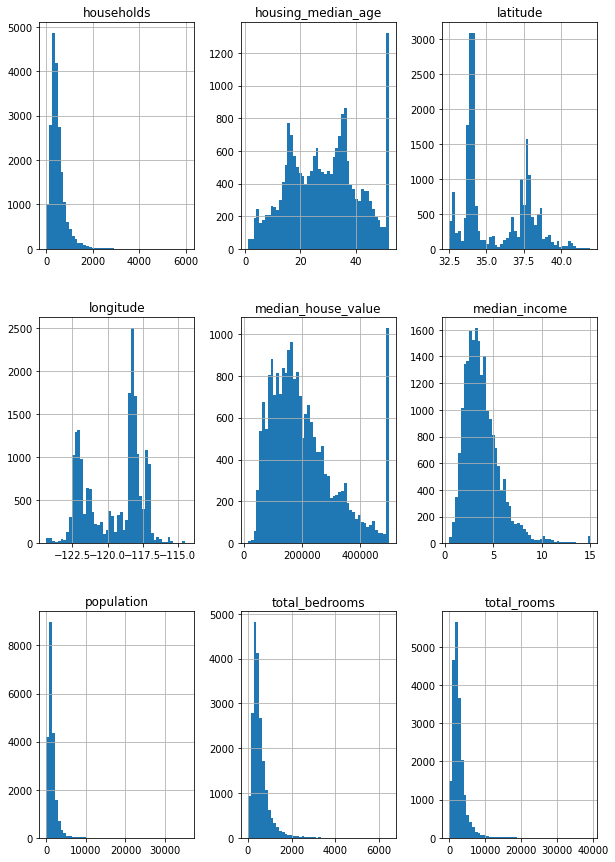

In [ ]:
housing.hist(bins=50, figsize=(10, 15))
plt.show()

To get different catagory in ocean proximity and number of instance in each catagory.

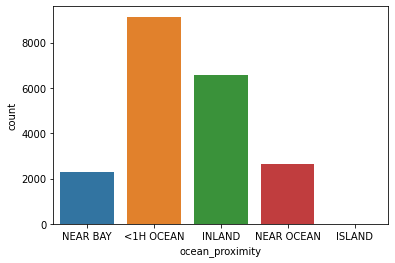

In [ ]:
housing["ocean_proximity"].value_counts()
sns.countplot(housing.ocean_proximity)

plotting correlation between each attribute using scatter plot

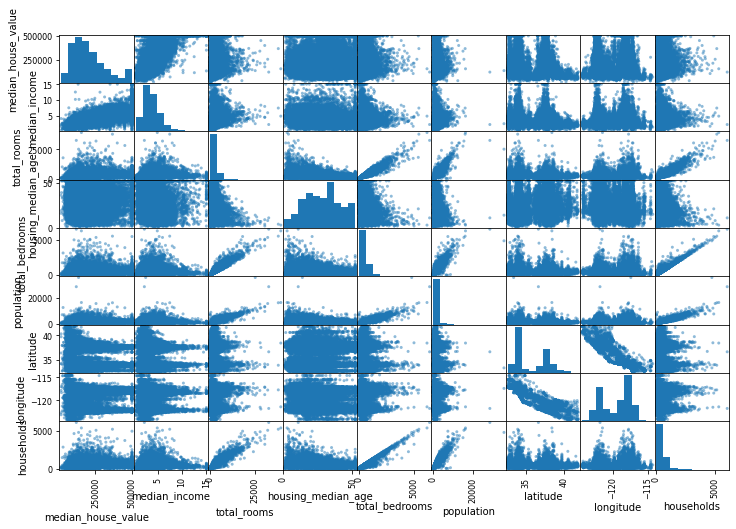

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income','total_rooms', 'housing_median_age',"total_bedrooms","population","latitude","longitude","households"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()


correlation of each attribute to the target attribute-median house value

In [ ]:
corr_matrix1=housing.corr()
print(corr_matrix1["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


from the above table median income looks like an important feature in prediction.Histogram representation of median_income and median_house_value are shown below

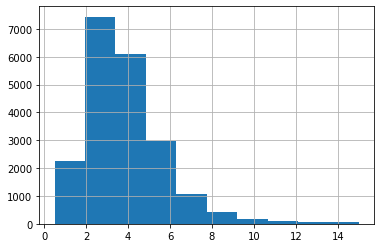

In [ ]:
median_income_plot=housing["median_income"].hist()


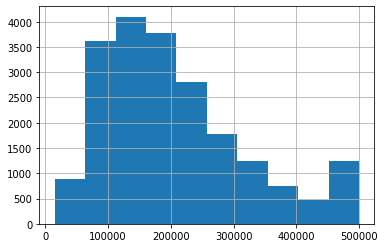

In [ ]:
median_house_value_plot=housing['median_house_value'].hist()

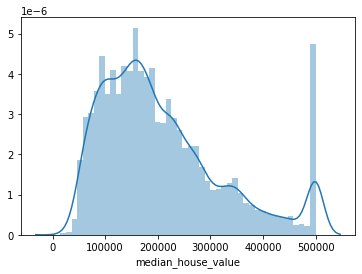

In [ ]:
median_house_value_plot2=sns.distplot(housing.median_house_value)

 We can see that the median house value is mostly falls between 10,0000 to 30,0000 with few exceptions.

DATA CLEANING

1.Filling missing data

In [ ]:
housing.isna().sum() 


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

These 207 missing data in total bedrooms are filled with median

In [ ]:
housing = housing.fillna(housing.median())
print("list showing number of null values :")
print(housing.isna().sum() )
print(housing["total_bedrooms"].median())

list showing number of null values :
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
435.0


2.Handling catagorical data

In [ ]:

new_val = pd.get_dummies(housing.ocean_proximity)
new_val.head(5)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [ ]:


housing[new_val.columns] = new_val



After converting catagorical data into some numeric values using pandas get_dummies method the data set look like:

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2.Checking outliers

In [ ]:
Q1=housing.quantile(0.25)
Q3=housing.quantile(0.75)
IQR=Q3-Q1
print(f"Q1 for each column:\n{Q1}\nQ3 for each column:\n{Q3}")
print(f"IQR for each column: \n{IQR}")


Q1 for each column:
longitude               -121.8000
latitude                  33.9300
housing_median_age        18.0000
total_rooms             1447.7500
total_bedrooms           297.0000
population               787.0000
households               280.0000
median_income              2.5634
median_house_value    119600.0000
<1H OCEAN                  0.0000
INLAND                     0.0000
ISLAND                     0.0000
NEAR BAY                   0.0000
NEAR OCEAN                 0.0000
Name: 0.25, dtype: float64
Q3 for each column:
longitude               -118.01000
latitude                  37.71000
housing_median_age        37.00000
total_rooms             3148.00000
total_bedrooms           643.25000
population              1725.00000
households               605.00000
median_income              4.74325
median_house_value    264725.00000
<1H OCEAN                  1.00000
INLAND                     1.00000
ISLAND                     0.00000
NEAR BAY                   0.00000
NE

Any value below Q1-1.5*IQR or above Q3+1.5*IQR is an Outlier


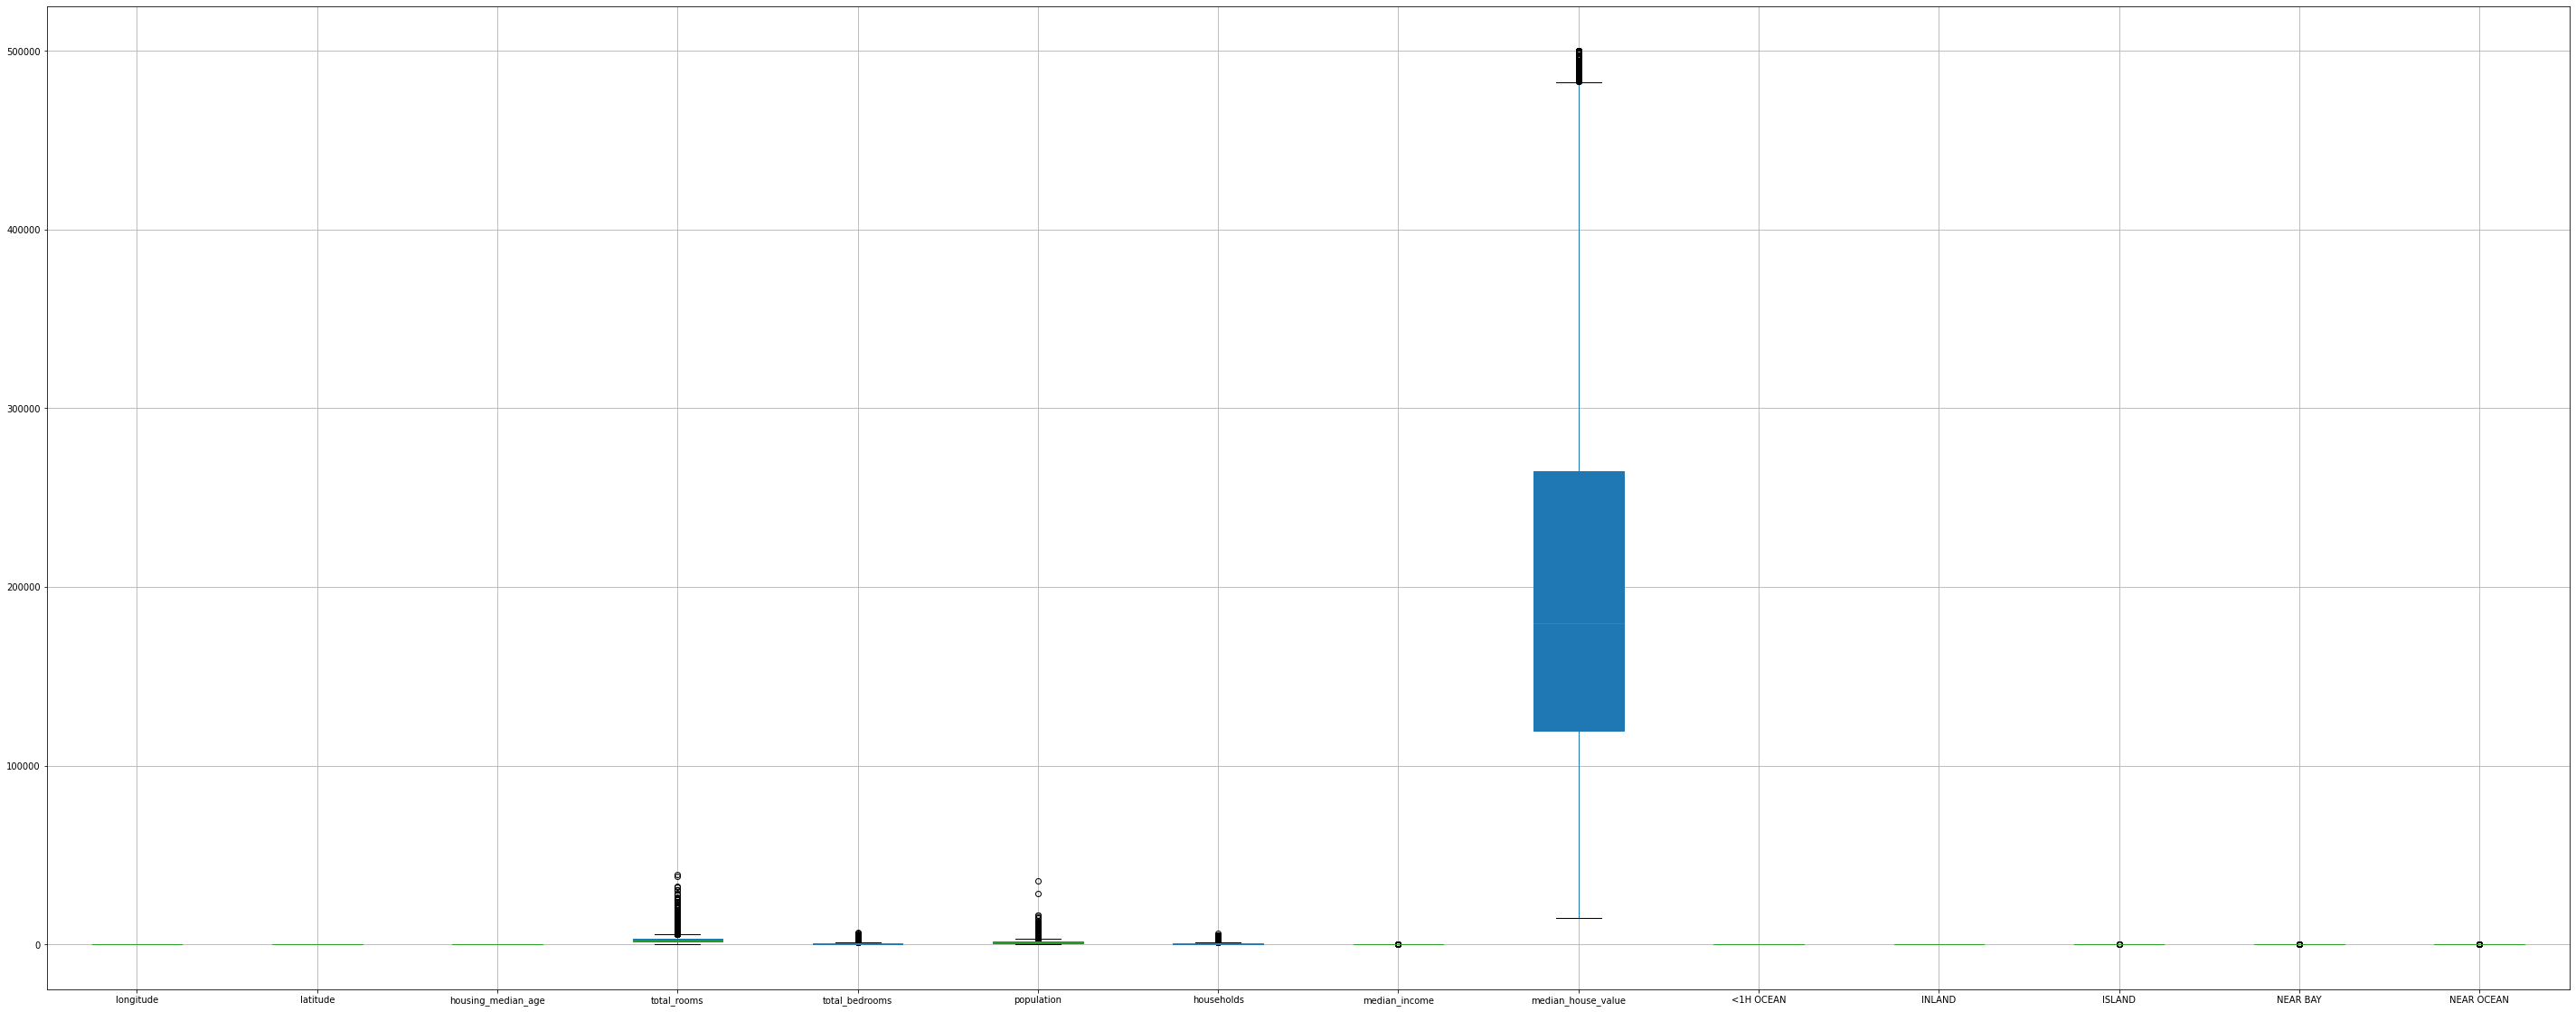

In [ ]:
plt.figure(figsize=(50,20))
boxplot1=housing.boxplot(patch_artist=True)
print("Any value below Q1-1.5*IQR or above Q3+1.5*IQR is an Outlier")




Presence of many outliers may degrade the model performance, so we are using IQR method to remove such outliers

In [ ]:

housing_out = housing[~((housing < (Q1 - 1.5 * IQR)) |(housing> (Q3 + 1.5 * IQR))).any(axis=1)]
housing_out.shape

(13475, 15)

In [ ]:
housing_out

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN,1,0,0,0,0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN,1,0,0,0,0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN,1,0,0,0,0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,1,0,0,0,0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [ ]:
housing_out=housing_out.drop(['ocean_proximity'],axis=1)

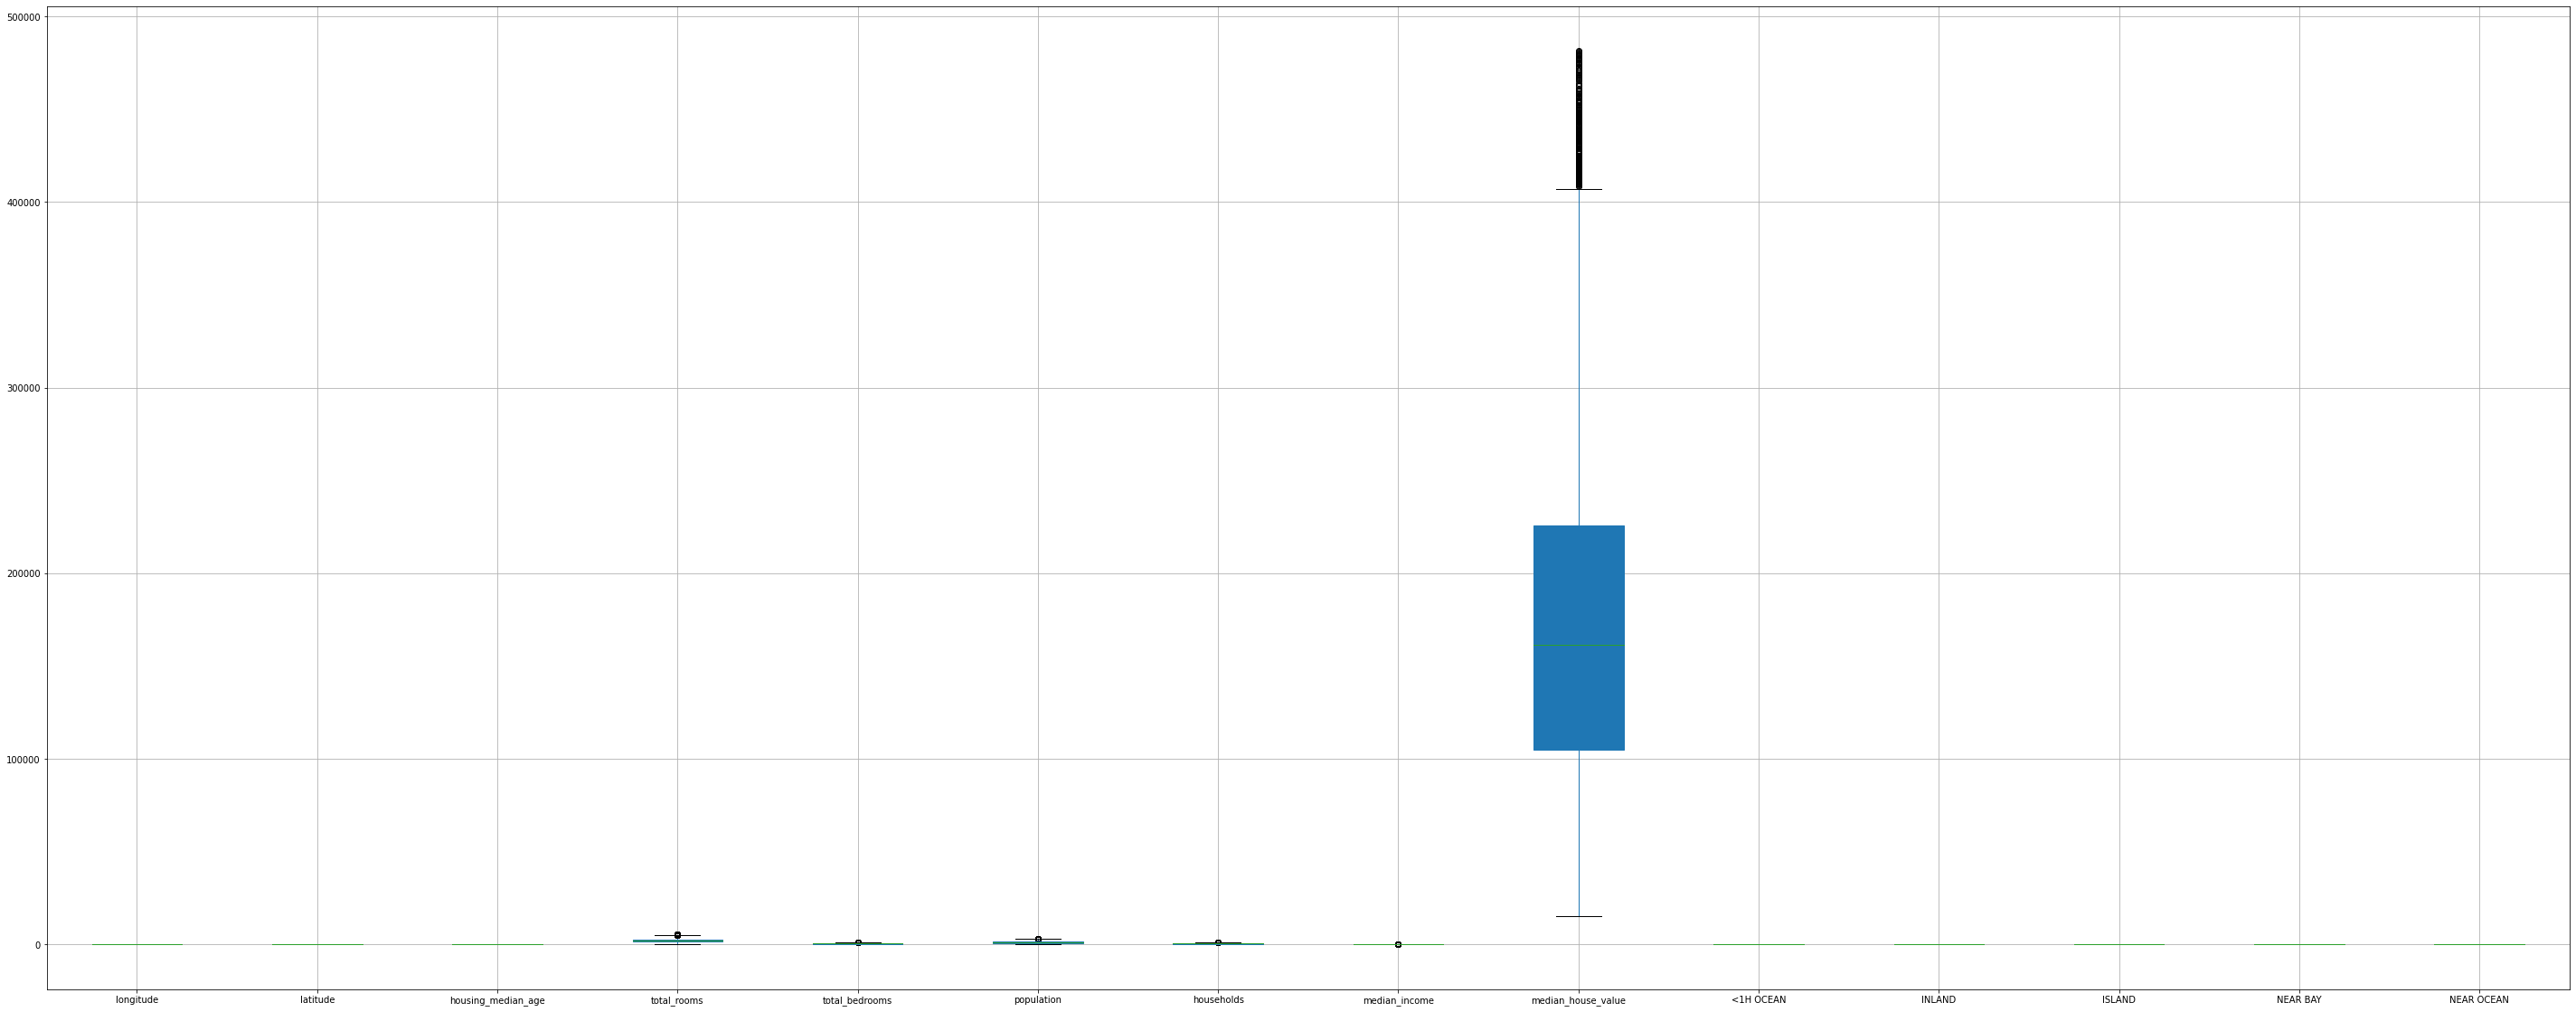

In [ ]:
plt.figure(figsize=(50,20))
boxplot1=housing_out.boxplot(patch_artist=True)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')


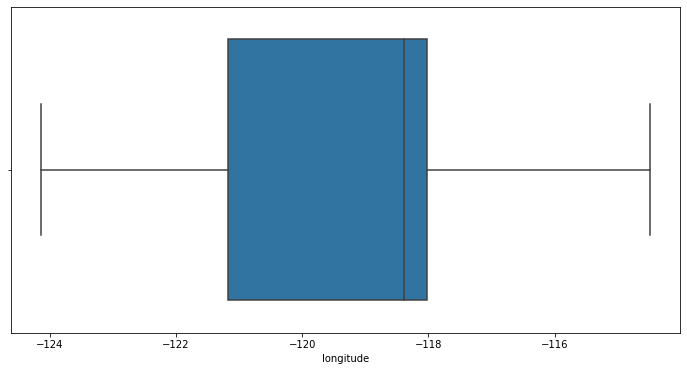

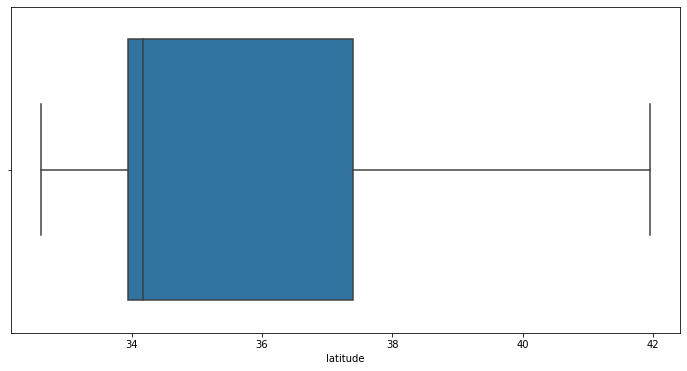

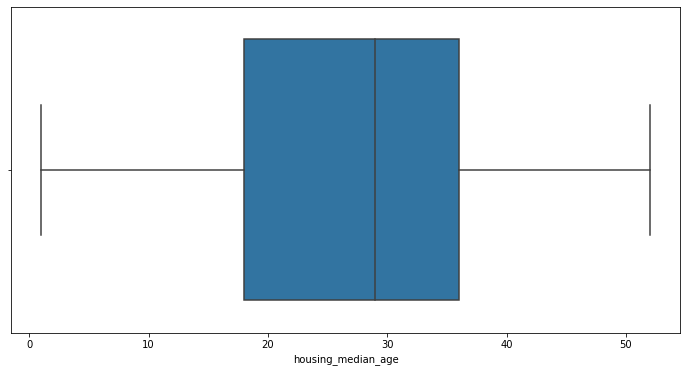

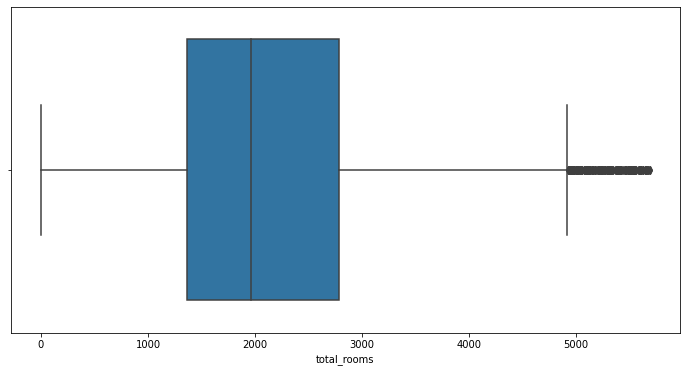

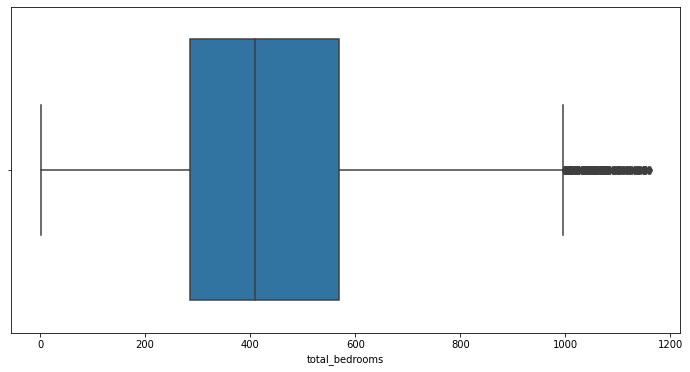

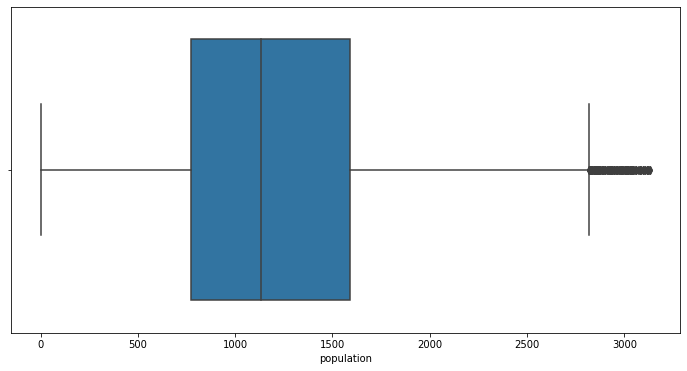

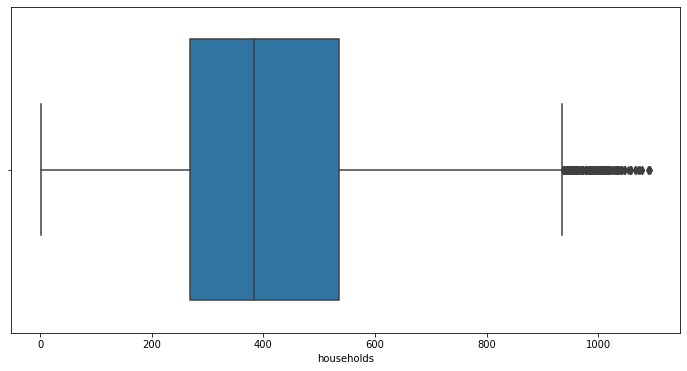

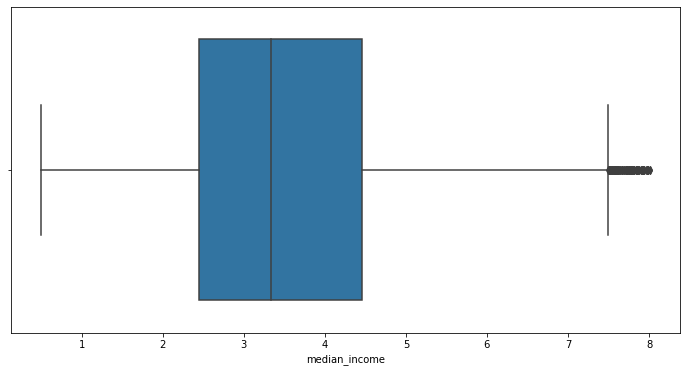

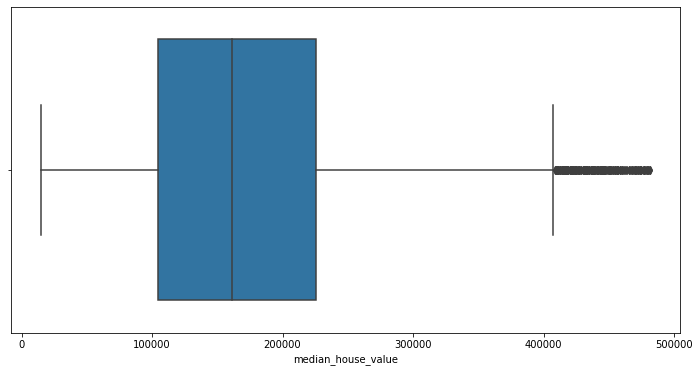

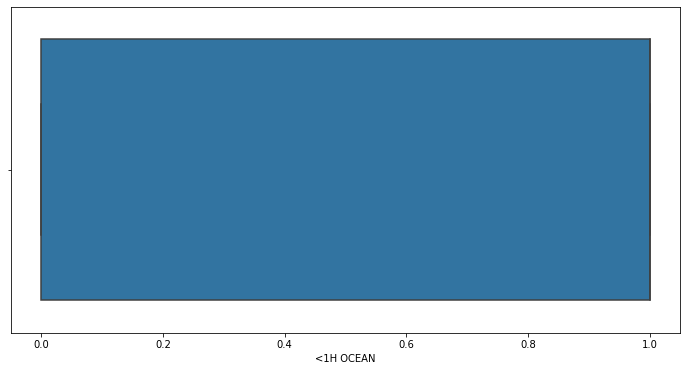

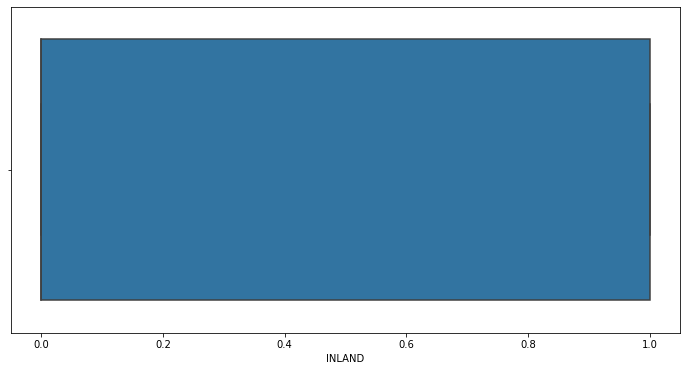

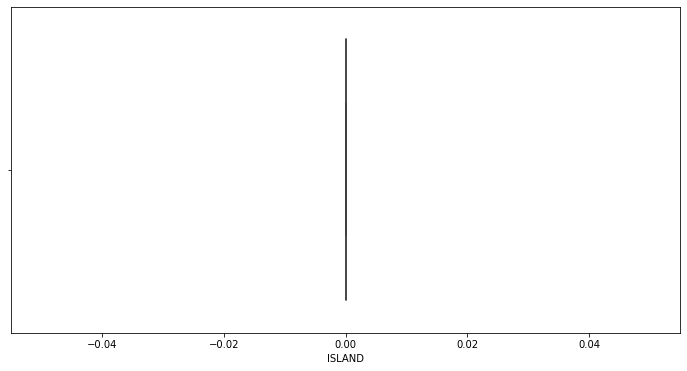

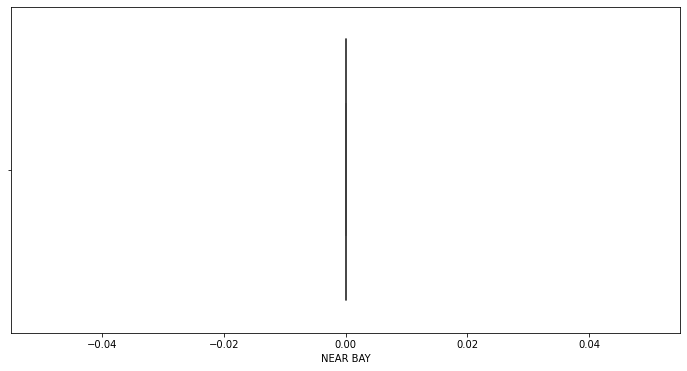

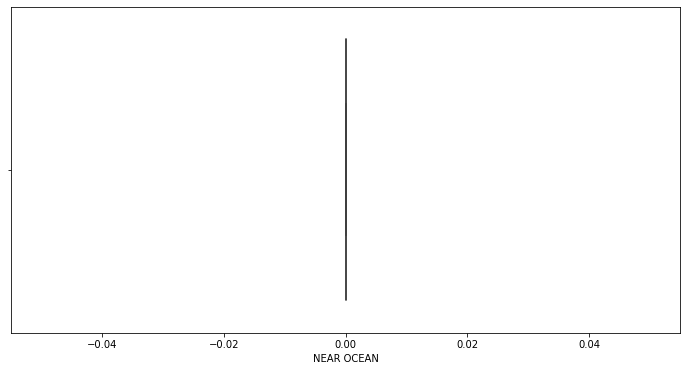

In [ ]:
#housing_out=housing_out.drop(["ocean_proximity"],axis=1)
num_features=housing_out.columns
print(num_features)
for i in num_features:
          fig, ax = plt.subplots()
          fig.set_size_inches(12,6)
          sns.boxplot(x=i,data=housing_out,ax=ax)
          
 

4.Checking skweness

There are still few outliers are present. The presence of these outliers may be due to the skewed distribution of the data.We will try to remove these outliers as well by transforming the data using log1p and boxcox1p functions. boxcox1p can be used for highly skewed features.

In [ ]:
skewness=[]
print(housing_out.columns)
num_features=housing_out.columns
for i in num_features:
    skewness.append(housing_out[i].skew())
pd.DataFrame(data=skewness,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')


,skewness
median_house_value,0.861035
latitude,0.720517
total_rooms,0.676363
total_bedrooms,0.645240
households,0.591962
population,0.590078
median_income,0.584933
INLAND,0.260313
housing_median_age,0.030476
ISLAND,0.000000


There are no high values of skewness of features, so we are not using any transform here(such as log1p)

Data scaling

In [ ]:

from sklearn import preprocessing
convert = preprocessing.StandardScaler() 
feature = housing_out.drop(['median_house_value'], axis=1)
label = housing_out.median_house_value

In [ ]:

featureT = convert.fit_transform(feature.values)
labelT = convert.fit_transform(housing_out.median_house_value.values.reshape(-1,1)).flatten() 



In [ ]:

featureT


array([[-1.50106965,  0.98934251,  0.32899606, ...,  0.        ,
         0.        ,  0.        ],
       [-1.5122266 ,  0.97507757, -1.63646334, ...,  0.        ,
         0.        ,  0.        ],
       [-1.50106965,  0.95605764, -0.61100626, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.08268369,  1.84048425, -0.95282529, ...,  0.        ,
         0.        ,  0.        ],
       [-1.13846849,  1.84048425, -0.86737053, ...,  0.        ,
         0.        ,  0.        ],
       [-1.09384065,  1.81195436, -1.03828005, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:

labelT


array([ 2.87541677,  0.46967296,  0.81367184, ..., -0.93217869,
       -1.01761632, -0.96477989])

Splitting data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test,label_train, label_test = train_test_split(featureT,labelT, test_size=0.2, random_state=19)                                   

ML MODEL

1)Multi-linear regression

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
linear_reg = linear_model.LinearRegression()
linear_reg.fit(feature_train,label_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:

predict=linear_reg.predict(feature_test)
predict

array([ 1.14048562,  0.10831955,  0.28972231, ..., -0.77905224,
       -0.67827101,  1.94036776])

In [ ]:
label_test

array([ 0.72711003,  0.79006407,  0.03798809, ..., -0.91868854,
        0.06272003,  1.51403557])

In [ ]:
linear_reg.coef_

array([-0.35739418, -0.41470242,  0.07489337, -0.13984198,  0.28822099,
       -0.39025695,  0.25660165,  0.58874163,  0.12912126, -0.12912126,
        0.        ,  0.        ,  0.        ])

Evaluating multiliear regression model

In [ ]:
from sklearn import metrics
print("mean squared error:",metrics.mean_squared_error(label_test,predict))
print("Root mean squared error:",np.sqrt(metrics.mean_squared_error(label_test,predict)))

mean squared error: 0.37658252665661285
Root mean squared error: 0.613663202951434


R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%.R-squared is a statistical measure of how close the data are to the fitted regression line. An R-squared of 100% means that all movements of a security (or another dependent variable) are completely explained by movements in the index (or the independent variable(s) you are interested in).

In [ ]:
r_2_score=r2_score(label_test,predict)
r_2_score

0.6340350712953062

In [ ]:
    score_reg=linear_reg.score(feature_test, label_test)

In [ ]:
score_reg

0.6340350712953062

This multi linear regression model has RSME = 0.613663202951434, MSE= 0.37658252665661285,r_2 score & score= 0.6340350712953062

2.Random forest regressor

In [ ]:


from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()



In [ ]:

forest_reg.fit(feature_train,label_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
pred=forest_reg.predict(feature_test)

In [ ]:
pred

array([ 1.14529351,  0.65931077,  0.15800548, ..., -1.06329173,
       -0.2866187 ,  2.61323566])

In [ ]:
print("mean squared error:",metrics.mean_squared_error(label_test,predict))
print("Root mean squared error:",np.sqrt(metrics.mean_squared_error(label_test,predict)))

mean squared error: 0.37658252665661285
Root mean squared error: 0.613663202951434


In [ ]:

r2_score(label_test,pred)


0.7979870209931322

Out of Multi-linear regression and random forest ,Based on the metrics above random forest is the best model

3.House price prediction using meadian _income alone ; Simple Linear Regression





In [ ]:
dropcol = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households",'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN',"median_house_value"]
print(dropcol)
housing_med =housing_out.drop(dropcol,axis=1)
print(housing_med)
print(type(housing_med))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'median_house_value']
       median_income
701           6.0574
830           4.6458
859           4.6146
860           5.7192
861           3.6832
...              ...
20635         1.5603
20636         2.5568
20637         1.7000
20638         1.8672
20639         2.3886

[13475 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


Scaling housing_med

In [ ]:
from sklearn import preprocessing
convert = preprocessing.StandardScaler()
featureT1 = convert.fit_transform(housing_med.values)

In [ ]:
print(featureT1)

[[ 1.73522882]
 [ 0.75971319]
 [ 0.73815178]
 ...
 [-1.27604335]
 [-1.1604963 ]
 [-0.80017195]]


In [ ]:
print(labelT)

[ 2.87541677  0.46967296  0.81367184 ... -0.93217869 -1.01761632
 -0.96477989]


In [ ]:

feature1_train,feature1_test,label1_train,label1_test = train_test_split(featureT1,labelT,test_size=0.2,random_state=19)


In [ ]:

from sklearn.linear_model import LinearRegression
linReg2 = LinearRegression()
linReg2.fit(feature1_train,label1_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred2 = linReg2.predict(feature1_test)

In [ ]:
y_pred2

array([ 1.18786447,  0.4873876 ,  0.15939184, ..., -0.35413057,
       -0.02876734,  1.89418646])

In [ ]:
label1_test


array([ 0.72711003,  0.79006407,  0.03798809, ..., -0.91868854,
        0.06272003,  1.51403557])

Evaluating simple linear regression model


In [ ]:
from sklearn.metrics import r2_score
reg_score = r2_score(label1_test,y_pred2)
reg_score

0.4206719449273695

In [ ]:
from sklearn import metrics
print("mean squared error:",metrics.mean_squared_error(label_test,y_pred2))
print("Root mean squared error:",np.sqrt(metrics.mean_squared_error(label_test,y_pred2)))

mean squared error: 0.596135874315856
Root mean squared error: 0.7720983579284805


While comparing the performance metrix for all three models,it is obvious that Random forest is showing best performance.Comparing multilinear regression and simple linear regression models, Multilinear regression model has better performance.